# Comparing Machine Learning Models for MNIST Digit Classification

# Introduction:
In this project, we aim to compare the performance of four machine learning models—Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbors (KNN), and Random Forest—for the task of classifying handwritten digits from the MNIST dataset. The MNIST dataset is a popular benchmark dataset in the machine learning community, consisting of 28x28 pixel grayscale images of handwritten digits (0-9).

The goal of this project is to train each model on the MNIST dataset and evaluate their performance based on metrics such as accuracy, precision, F1-Score, and confusion matrix. By comparing the performance of these models, we aim to gain insights into their strengths and weaknesses for the digit classification task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)

/Users/dhruv/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
x, y =  mnist.data, mnist.target

In [7]:
x.shape

(70000, 784)

In [8]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

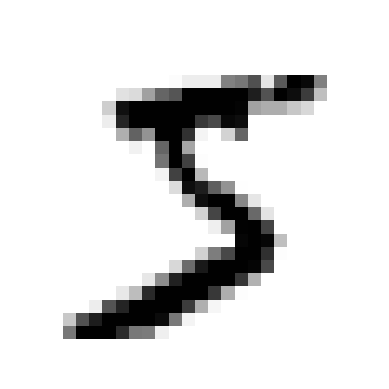

In [11]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    
some_digit = x[0]
plot_image(some_digit)
plt.show()

In [12]:
y[0]

'5'

## Spliting data for training and testing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
# Print the shapes of the preprocessed data
print("Training set shape:", x_train_scaled.shape)
print("Testing set shape:", x_test_scaled.shape)

Training set shape: (60000, 784)
Testing set shape: (10000, 784)


In [17]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Training multiclass classifier using SVM

In [18]:
from sklearn.svm import SVC

In [19]:
SVM = SVC(kernel='rbf', random_state=42)
SVM.fit(x_train,y_train)

SVC(random_state=42)

In [20]:
# Model Prediction
y_pred = SVM.predict(x_test)

In [21]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9792


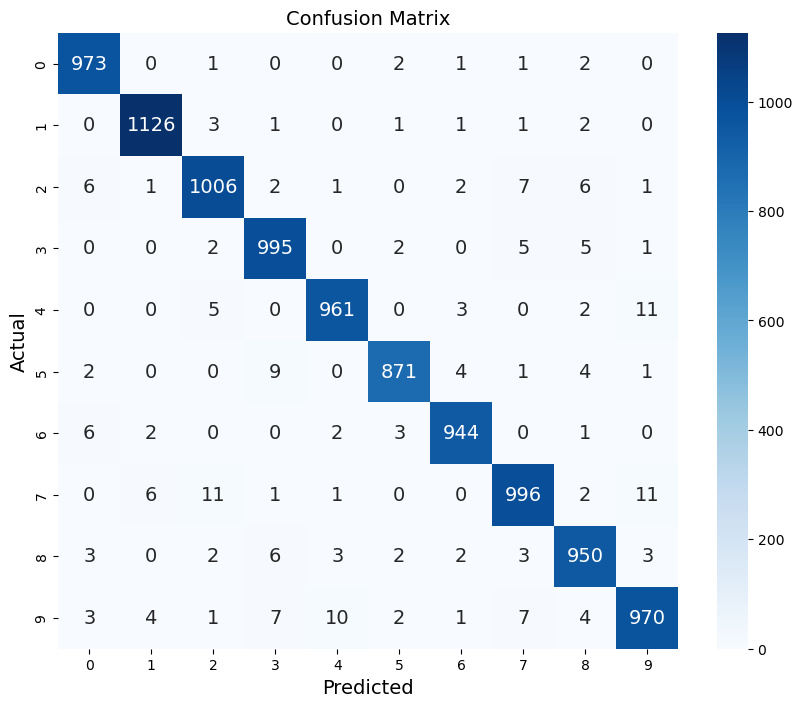

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred, average='weighted')
print(f"SVM Precision: {precision_svm}")

SVM Precision: 0.9792006017788697


In [24]:
f1_svm = f1_score(y_test, y_pred, average='weighted')
print(f"SVM F1-score: {f1_svm}")

SVM F1-score: 0.9791856837674859


## Training multilcass classifier using Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_clf = DecisionTreeClassifier(random_state=42)

In [27]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_pred = tree_clf.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8755


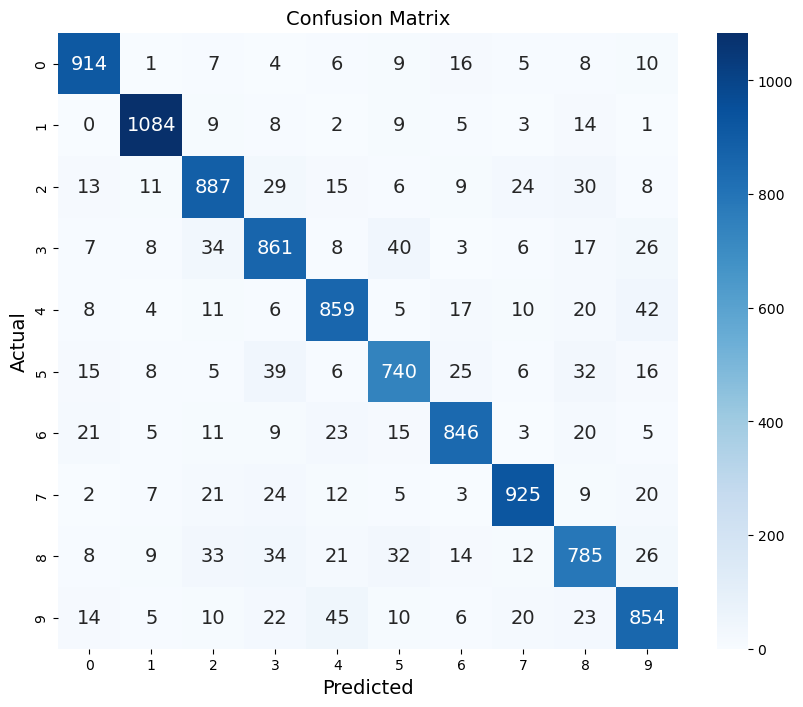

In [30]:
cm_1 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
precision_tree = precision_score(y_test, y_pred, average='weighted')
print(f"Decision Tree Precision: {precision_tree}")

Decision Tree Precision: 0.8754324378964488


In [32]:
f1_tree = f1_score(y_test, y_pred, average='weighted')
print(f"Decision Tree F1-score: {f1_tree}")

Decision Tree F1-score: 0.8754100262367849


## Training multilcass classifier using KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(x_test_scaled)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9443


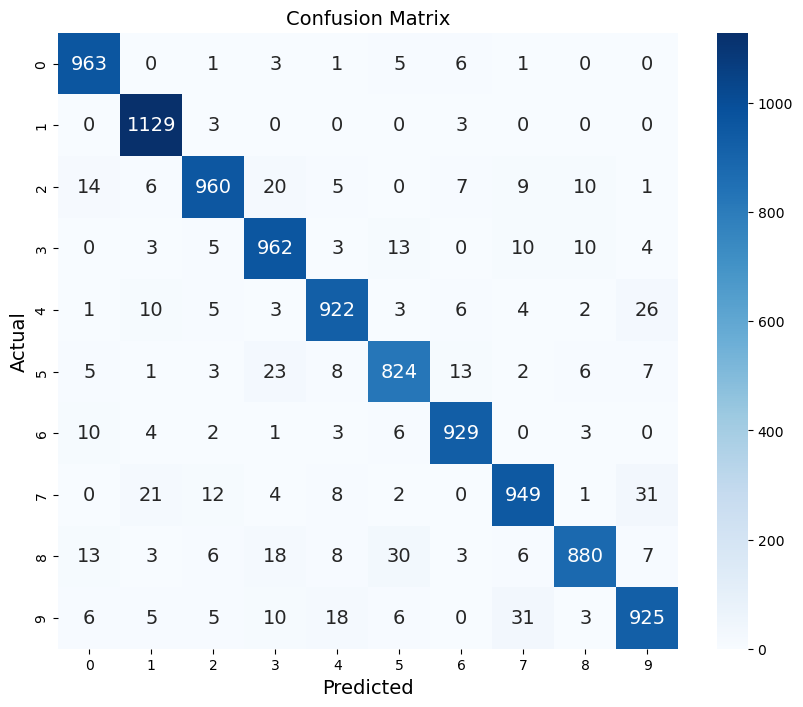

In [38]:
cm_2 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
precision_knn = precision_score(y_test, y_pred, average='weighted')
print(f"KNN Precision: {precision_knn}")

KNN Precision: 0.9444011950891332


In [40]:
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f"KNN F1-score: {f1_knn}")

KNN F1-score: 0.9441343875945922


## Training multilcass classifier using RandomForest

In [41]:
from sklearn.ensemble._forest import RandomForestClassifier

In [42]:
rfc_tree = RandomForestClassifier(random_state=42, max_depth=20)

In [43]:
rfc_tree.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [44]:
y_pred = rfc_tree.predict(x_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9679


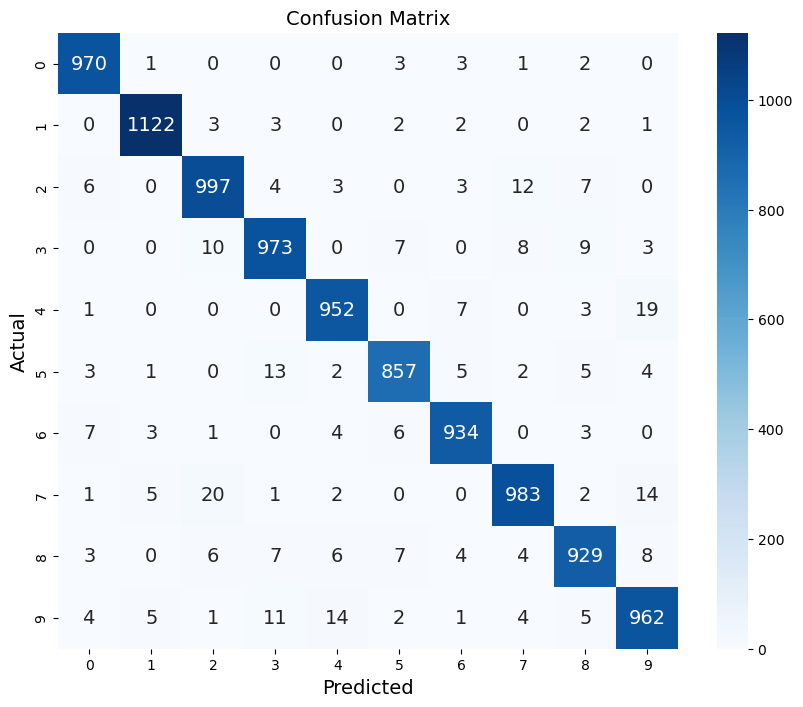

In [46]:
cm_3 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
precision_rfc = precision_score(y_test, y_pred, average='weighted')
print(f"Random Forest Precision: {precision_rfc}")

Random Forest Precision: 0.9678924448289048


In [48]:
f1_rfc = f1_score(y_test, y_pred, average='weighted')
print(f"Random Forest F1-score: {f1_rfc}")

Random Forest F1-score: 0.9678818959924617


# Hyperparameter Tuning 

In [49]:
from sklearn.model_selection import GridSearchCV

## Hyperparameter tuning for SVM

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(x_train_scaled, y_train)

In [ ]:
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
print("Best SVM parameters:", grid_search_svm.best_params_)
print("SVM Accuracy after tuning:", accuracy_svm)

## Hyperparameter tuning for Decision Tree

In [ ]:
param_grid_tree = {'max_depth': [None, 10, 20, 30]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
grid_search_tree.fit(x_train, y_train)

In [ ]:
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [ ]:
print("Best Decision Tree parameters:", grid_search_tree.best_params_)
print("Decision Tree Accuracy after tuning:", accuracy_tree)

## Hyperparameter tuning for KNN

In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(x_train_scaled, y_train)

In [ ]:
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
print("Best KNN parameters:", grid_search_knn.best_params_)
print("KNN Accuracy after tuning:", accuracy_knn)

# Conclusion

In this project, I trained and evaluated four machine learning models—Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbors (KNN), and Random Forest—for classifying handwritten digits from the MNIST dataset. I followed a systematic approach, including data preprocessing, model training, hyperparameter tuning, and model evaluation, to compare their performance.

After training and evaluating the models, I achieved the following accuracy scores:

SVM: 97%
Decision Tree: 87%
KNN: 94%
Random Forest: 96% (after fixing max_depth)
From the results, it is evident that SVM performed the best, followed by KNN and Decision Tree. Initially, Random Forest had a lower accuracy, but after increasing the max_depth parameter, its accuracy improved significantly.

Overall, this project demonstrates the effectiveness of different machine learning models for digit classification tasks. Further improvements can be made by exploring additional hyperparameter tuning and feature engineering techniques.